(sec-ugate)=

# U Gate

When a gate acts on a qubit, it rotates the Bloch vector.  Any rotation can be specified with three angles, $\theta$, $\phi$, and $\lambda$.  They are known as [*Euler angles*](https://en.wikipedia.org/wiki/Euler_angles). In standard quantum computation, a standard Euler rotation $z-y-z$ is used.  That is rotating 1) around $z$ axis by $\lambda$, 2) around $y$ axis by $\theta$, and 3) around $z$ axis by $\phi$.  The rotations must be done in this order.  This gate transforms $|0\rangle$ to a general qubit state.

[Qiskit API References: UGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html)

## Definition

**Transformation**

>$$
\begin{eqnarray}
U(\theta,\phi,\lambda) |0\rangle &=& \cos(\theta/2) |0\rangle + \sin(\theta/2) e^{i \phi} |1\rangle \\
U(\theta,\phi,\lambda) |1\rangle &=& - e^{i \phi} \left[\sin(\theta/2) |0\rangle  - \cos(\theta/2) e^{i \lambda}|1\rangle\right]
\end{eqnarray}
$$

Notice that when it acts on $|0\rangle$, we obtain a general state in the Bloch sphere expression  {eq}`bloch-vector`  (no $\lambda$ appears in it).

**Matrix expression**

>$$
U(\theta,\phi,\lambda) \doteq \begin{bmatrix} \cos(\theta/2) & - e^{i \phi} \sin(\theta/2) \\ e^{i \lambda} \sin(\theta/2) & e^{i (\lambda+\phi)} \cos(\theta/2)\end{bmatrix}
$$

**Using Rotation gates**

The $U$ gate used to be defined as $U(\theta,\phi,\lambda)=R_z(\phi) R_y(\theta) R_z(\lambda)$. (See [OpenQASM 2](https://doi.org/10.48550/arXiv.1707.03429).)  However, it adds a global phase on the Bloch sphere expression. To remove the inconvenience, now it is officially defined in [OpenQASM 3](https://openqasm.com/language/gates.html#built-in-gates) as

>$$
U(\theta,\phi,\lambda) = e^{i (\lambda+\phi)/2} R_z(\phi) R_y(\theta) R_z(\lambda) .
$$

The Qiskit circuit code symbol is `u` and it appears in quantum circuit as

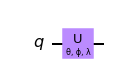

In [6]:
from qiskit.circuit import QuantumCircuit, Parameter
theta=Parameter('\u03B8')
phi=Parameter('\u03D5')
lamb=Parameter('\u03BB')
qc=QuantumCircuit(1)
qc.u(theta,phi,lamb,0)
qc.draw('mpl')

or

In [7]:
qc.draw()

┌──────────┐
q: ┤ U(θ,ϕ,λ) ├
   └──────────┘


---
**Qiskit Example** {numref}`%s <sec-ugate>`.1&nbsp;  Generate a state $\cos(\pi/3)|0\rangle + \sin(\pi/3) e^{-i \pi/7} |1\rangle$ in a quantum circuit.

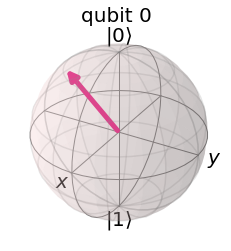

In [10]:
# import numpy
import numpy as np

# import QuatumCircuit and QuantumRegister classes.
from qiskit import QuantumCircuit, QuantumRegister

# import STatevector class
from qiskit.quantum_info import Statevector

# Preparation
qr=QuantumRegister(1,'q') # create a single qubit with name 'q'.
qc=QuantumCircuit(qr)  # create a quantum circuit

#  apply the Ugate to the qubit
qc.u(np.pi/5,-np.pi/3,0,0)

# Plot the final state
Statevector(qc).draw('bloch')

## Acting on a superposition state

$$
U(\theta,\phi,\lambda)\left(c_0|0\rangle+c_1|1\rangle\right) 
=\left[c_0 \cos(\theta/2) - c_1 e^{i\phi} \sin(\theta/2)\right]|0\rangle
+ e^{i \phi} \left[ c_0 \sin(\theta/2) + c_1 e^{i \lambda}\cos(\theta/2) \right]|1\rangle
$$



---
Last modified: 08/31/2022